<a href="https://colab.research.google.com/github/aj2622/Computational-CogSci/blob/master/Bayesian_modeling_Probabilistic_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilistic programs for productive reasoning

In [0]:
# Import the necessary packages
from __future__ import print_function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats.mstats import pearsonr

In [0]:
class world():
    def __init__(self):
        self.dict_strength = {}
    def clear(self): # used when sampling over possible world
        self.dict_strength = {}

W = world()

def strength(name):
    if name not in W.dict_strength:
        W.dict_strength[name] = abs(random.gauss(10,3))
    return W.dict_strength[name]

In [0]:
def lazy(name):
    return random.random() < 0.1

In [0]:
def team_strength(team):
    # team : list of names
    mysum = 0.
    for name in team:
        if lazy(name):
            mysum += (strength(name) / 2.)
        else:
            mysum += strength(name)
    return mysum

In [0]:
def winner(team1,team2):
    # team1 : list of names
    # team2 : list of names
    if team_strength(team1) > team_strength(team2):
        return team1
    else:
        return team2

def beat(team1,team2):
    return winner(team1,team2) == team1

In [0]:
def rejection_sampler(f_return, list_f_conditions, nsamp=10000):
    # Input
    #  f_return : function handle that grabs the variable of interest when executed
    #  list_f_conditions: list of conditions (function handles) that we are assuming are True
    #  nsamp : number of samples (10000)
    # Output
    #  samples : (as a numpy-array) of length nsamp
    samples = []
    for i in range(nsamp):        
        # TODO : your code goes here (don't forget to call W.clear() before each attempted sample)
        W.clear()
        b = True
        for f in list_f_conditions:
            #print(f())
            b = b and f()
        if b == True:
            samples.append(f_return())
    #print(samples)
    return np.array(samples)

In [7]:
f_return = lambda : strength('bob')
list_f_conditions = [lambda : beat( ['bob', 'mary'],['tom', 'sue'] ), lambda : beat( ['bob', 'sue'],  ['tom', 'jim'] )]
samples = rejection_sampler(f_return, list_f_conditions, nsamp=50000)
mean_strength = np.mean(samples)
print("Estimate of Bob's strength: mean = " + str(mean_strength) + "; effective n = " + str(len(samples)))

Estimate of Bob's strength: mean = 11.896479114970838; effective n = 13721


In [0]:
# TODO : YOUR DATA GOES HERE
subject1_pred = np.array([5,6,7,3,6,6])
subject2_pred = np.array([4,5,7,2,4,4])

In [9]:
model_pred = []

f_return = lambda : strength('A')

f_conditions = [lambda : beat( ['A', 'B'],['C', 'D'] ), lambda : beat( ['A', 'B'],['E', 'F'] ), lambda : beat( ['A', 'B'],  ['G', 'H'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 1")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

f_conditions = [lambda : beat( ['A', 'B'],['E', 'F'] ), lambda : beat( ['A', 'C'],['E', 'G'] ), lambda : beat( ['A', 'D'],  ['E', 'H'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 2")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

f_conditions = [lambda : beat( ['A', 'B'],['E', 'F'] ), lambda : beat(['E', 'F'], ['B', 'C'] ), lambda : beat( ['E', 'F'], ['B', 'D'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 3")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

f_conditions = [lambda : beat( ['A', 'B'],['E', 'F'] ), lambda : beat( ['B', 'C'],['E', 'F'] ), lambda : beat( ['B', 'D'],  ['E', 'F'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 4")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

f_conditions = [lambda : beat( ['A', 'B'],['E', 'F'] ), lambda : beat( ['A', 'C'],['G', 'H'] ), lambda : beat( ['A', 'D'],  ['I', 'J'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 5")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

f_conditions = [lambda : beat( ['A', 'B'],['C', 'D'] ), lambda : beat( ['A', 'C'],['B', 'D'] ), lambda : beat( ['A', 'D'],  ['B', 'C'] ) ]
samples = rejection_sampler(f_return, f_conditions)
print("Scenario 6")
print("  sample mean : " + str(np.mean(samples)) + "; n=" + str(len(samples)))
model_pred.append(np.mean(samples))

Scenario 1
  sample mean : 12.15555880484714; n=2169
Scenario 2
  sample mean : 12.012258761762943; n=2183
Scenario 3
  sample mean : 12.19585889904489; n=724
Scenario 4
  sample mean : 10.55271012089379; n=2755
Scenario 5
  sample mean : 12.56470710902732; n=1691
Scenario 6
  sample mean : 13.19515264939718; n=1239


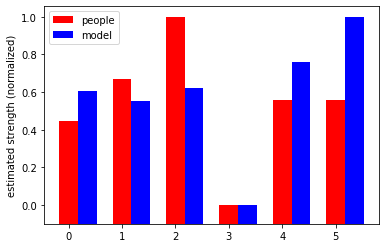

correlation between human and model predictions; r = 0.624


In [10]:
def normalize(v):
    # scale vector v to have min 0 and max 1
    v = v - np.min(v)
    v = v / np.max(v)
    return v

human_pred_norm = normalize((subject1_pred+subject2_pred)/2.)
model_pred_norm = normalize(model_pred)

# compare predictions from people vs. Bayesian mdoel
mybottom = -0.1
width = 0.35 
plt.figure(1)
plt.bar(np.arange(len(human_pred_norm)),human_pred_norm-mybottom, width, bottom=mybottom, color='red')
plt.bar(np.arange(len(human_pred_norm))+width, model_pred_norm-mybottom, width, bottom=mybottom, color='blue')
plt.ylabel('estimated strength (normalized)')
plt.legend(('people','model'))
plt.show()

r = pearsonr(human_pred_norm,model_pred_norm)[0]
print('correlation between human and model predictions; r = ' + str(round(r,3)))

In [11]:
class world_v2():
    def __init__(self):
        self.dict_strength = {}
        self.dict_temper = {}
    def clear(self): # used when sampling over possible world
        self.dict_strength = {}
        self.dict_temper = {}

def strength_v2(name):
    if name not in W.dict_strength:
        W.dict_strength[name] = abs(random.gauss(10,3))
    return W.dict_strength[name]

def lazy_v2(name):
    return random.random() < 0.1
        
def has_temper(name):
    # each player has a 0.2 probability of having a temper
    # TODO: YOUR CODE GOES HERE
    if name not in W.dict_temper:
        if random.random() < 0.2:
            W.dict_temper[name] = True
        else:
            W.dict_temper[name] = False
    return W.dict_temper[name]
    
def team_strength_v2(team):
    # team : list of names
    mysum = 0.
    for name in team:
        if lazy_v2(name):
            mysum += (strength_v2(name) / 2.)
        else:
            mysum += strength_v2(name)
    # if all of the players have a temper, divide sum strength by 4
    ## TODO : YOUR CODE GOES HERE
    temper = True
    for name in team:
        if name not in W.dict_temper:
            has_temper(name)
        temper = temper and W.dict_temper[name]
    if temper == True:
        mysum = mysum/4
    return mysum

def winner_v2(team1,team2):
    # team1 : list of names
    # team2 : list of names
    if team_strength_v2(team1) > team_strength_v2(team2):
        return team1
    else:
        return team2

def beat_v2(team1,team2):
    return winner_v2(team1,team2) == team1

W = world_v2()

f_return = lambda : strength_v2('bob')
list_f_conditions = [lambda : not has_temper('tom'), lambda : not has_temper('sue'), lambda : beat_v2( ['bob', 'mary'],['tom', 'sue'] ), lambda : beat_v2( ['bob', 'sue'],  ['tom', 'jim'] )]
samples = rejection_sampler(f_return, list_f_conditions, nsamp=100000)
mean_strength = np.mean(samples)
print("If Tom and Sue do not have tempers...")
print("  Estimate of Bob's strength: mean = " + str(mean_strength) + "; effective n = " + str(len(samples)))

list_f_conditions = [lambda : has_temper('tom'), lambda : has_temper('sue'), lambda : beat_v2( ['bob', 'mary'],['tom', 'sue'] ), lambda : beat_v2( ['bob', 'sue'],  ['tom', 'jim'] )]
samples = rejection_sampler(f_return, list_f_conditions, nsamp=100000)
mean_strength = np.mean(samples)
print("If Tom and Sue BOTH have tempers...")
print("  Estimate of Bob's strength: mean = " + str(mean_strength) + "; effective n = " + str(len(samples)))

If Tom and Sue do not have tempers...
  Estimate of Bob's strength: mean = 11.870218337142315; effective n = 17144
If Tom and Sue BOTH have tempers...
  Estimate of Bob's strength: mean = 10.769009696472747; effective n = 2049
